In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential

#from tensorflow.keras import layers
#https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

In [2]:
tf.__version__

'2.3.0'

In [3]:
mnist = tf.keras.datasets.mnist # flatten 28*28 images to a 784 vector for each image of hand-written digit 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0416 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0257 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9760
0.12041500210762024 0.9760000109672546


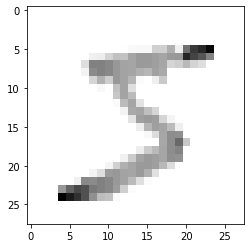

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

# to save a model

In [6]:
model.save("epic_num_reader.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [7]:
new_model = tf.keras.models.load_model("epic_num_reader.model")

In [8]:
predictions = new_model.predict([x_test])

In [9]:
print(predictions)

[[1.3119941e-13 3.0618683e-09 9.4711197e-11 ... 9.9999988e-01
  6.4385122e-14 1.1667294e-09]
 [2.5493249e-14 1.0216297e-06 9.9999893e-01 ... 8.7845205e-16
  1.6886156e-12 3.4319620e-19]
 [1.3869068e-15 1.0000000e+00 1.7960060e-08 ... 3.5680989e-09
  3.0636444e-09 1.1768612e-12]
 ...
 [1.9147169e-16 8.7833039e-09 4.6303293e-13 ... 7.9194990e-08
  5.4109571e-13 3.4736850e-08]
 [4.7771349e-12 8.0020989e-13 5.7783962e-11 ... 1.3557830e-11
  1.4293148e-06 3.3702496e-16]
 [4.1342238e-16 2.1322033e-16 2.2816302e-15 ... 9.2293929e-22
  7.3905505e-15 3.2216205e-21]]


In [10]:
print(np.argmax(predictions[0]))

7


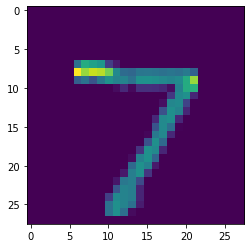

In [11]:
plt.imshow(x_test[0])
plt.show()

# working on a dataset

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential


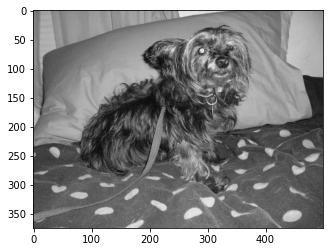

In [13]:
DATADIR = r"C:\Users\Nurudeen Abolarinwa\Desktop\deep learning course\petimages"
CATEGORIES = ["Dog", "Cat"]


for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [14]:
print(img_array.shape)

(375, 500)


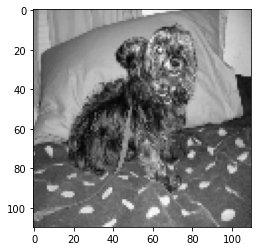

In [15]:
IMG_SIZE = 110
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [16]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as a:
                pass
            
create_training_data()
 

In [17]:
print(len(training_data))

24946


In [18]:
import random
random.shuffle(training_data)

In [19]:
for sample in training_data[1:10]:
    print(sample[1])

0
1
1
0
0
1
0
0
0


In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [23]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [24]:
X[1]

array([[[193],
        [192],
        [190],
        ...,
        [ 59],
        [ 81],
        [ 73]],

       [[195],
        [193],
        [191],
        ...,
        [ 61],
        [ 78],
        [ 84]],

       [[195],
        [195],
        [192],
        ...,
        [ 65],
        [ 79],
        [ 94]],

       ...,

       [[131],
        [135],
        [137],
        ...,
        [134],
        [143],
        [148]],

       [[134],
        [132],
        [132],
        ...,
        [141],
        [145],
        [149]],

       [[141],
        [135],
        [139],
        ...,
        [150],
        [148],
        [144]]], dtype=uint8)

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [26]:
#model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)

In [27]:
len(y)

24946

In [28]:
X.shape[1:]

(110, 110, 1)

In [29]:
type(X)

numpy.ndarray

In [30]:
y = np.array(y)

In [31]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
546/546 [==============================] - 444s 813ms/step - loss: 0.6955 - accuracy: 0.5525 - val_loss: 0.6773 - val_accuracy: 0.5871
Epoch 2/3
546/546 [==============================] - 447s 818ms/step - loss: 0.6605 - accuracy: 0.6066 - val_loss: 0.6222 - val_accuracy: 0.6738
Epoch 3/3
546/546 [==============================] - 453s 829ms/step - loss: 0.5763 - accuracy: 0.6995 - val_loss: 0.5397 - val_accuracy: 0.7349
